### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [2]:
filename = 'LinearRegression_Models/A/A_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [3]:
x_col = 'prop_cbd'
testing_data = pd.read_csv('A_testing_data_new.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Target'])

#### Step 4

Plot the test data features, targets and linear regression model to visually evaluate the model.

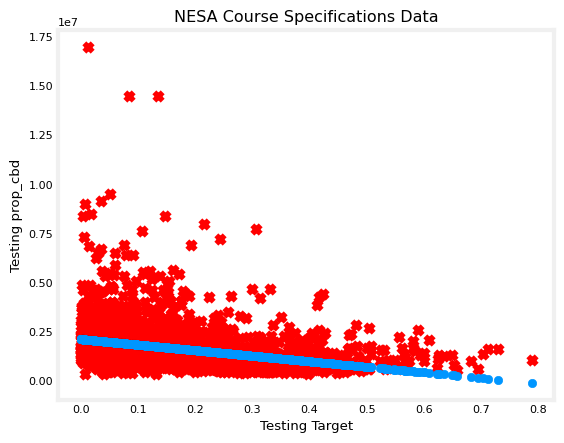

In [4]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.scatter(x_test, y_pred)
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

- As mentioned previously the linear regression model has high cost, representative of its lack of applicability here for predicting house prices

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [5]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.08363255175060591


- This is a very poor scores and further illustrates how there is no linear relationship between a single input feature and the target 

#### Step 7 

- Manually Calculate and evaluate the 'loss' and 'cost' of the model using the testing data

In [6]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

        Target  date_sold  Predicted result        Loss
0     0.128893    1600000      1.761856e+06  -161855.88
1     0.062907     775000      1.947520e+06 -1172520.01
2     0.004606    1800000      2.111561e+06  -311561.37
3     0.166629    1600000      1.655681e+06   -55680.74
4     0.148117    1390000      1.707766e+06  -317766.49
...        ...        ...               ...         ...
2329  0.277046    1050000      1.345001e+06  -295001.28
2330  0.015509    3050000      2.080884e+06   969115.82
2331  0.255869     845000      1.404588e+06  -559587.78
2332  0.094004    1210000      1.860024e+06  -650023.78
2333  0.063015     745000      1.947215e+06 -1202215.09

[2334 rows x 4 columns]
The cost or average loss of this model is 34352.84711653814


- As you can see there is an extremely high cost when just using one input feature. So Linear Regression is not the suitable choice of machine learning algorithm for my scope, and there is no need to test the apartment (B) model as the result will be similar